In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Akash Kumar
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Akash Kumar
[nltk_data]     Verma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [194]:
df = pd.read_csv('data.csv')

In [195]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [196]:
df.shape

(3446, 2)

In [197]:
df['Category'].value_counts()

Category
HR                           154
BUSINESS-DEVELOPMENT         120
INFORMATION-TECHNOLOGY       120
FINANCE                      118
CHEF                         118
ADVOCATE                     118
ACCOUNTANT                   118
ENGINEERING                  118
FITNESS                      117
AVIATION                     117
SALES                        116
CONSULTANT                   115
BANKING                      115
HEALTHCARE                   115
CONSTRUCTION                 112
PUBLIC-RELATIONS             111
DESIGNER                     107
ARTS                         103
TEACHER                      102
APPAREL                       97
DIGITAL-MEDIA                 96
Java Developer                84
Testing                       70
AGRICULTURE                   63
DevOps Engineer               55
Python Developer              48
Web Designing                 45
Hadoop                        42
Data Science                  40
Mechanical Engineer           40
O

In [198]:
df['Category'] = df['Category'].str.lower()

In [199]:
low_f1 = ['bpo', 'automobile', 'arts', 'teacher', 'agriculture', 'apparel']
df = df[~df['Category'].isin(low_f1)]

In [200]:
df['Category'].unique()

array(['data science', 'hr', 'advocate', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing',
       'designer', 'information-technology', 'business-development',
       'healthcare', 'fitness', 'consultant', 'digital-media', 'chef',
       'finance', 'engineering', 'accountant', 'construction',
       'public-relations', 'banking', 'aviation'], dtype=object)

In [201]:
df['Category'].isnull().sum()

np.int64(0)

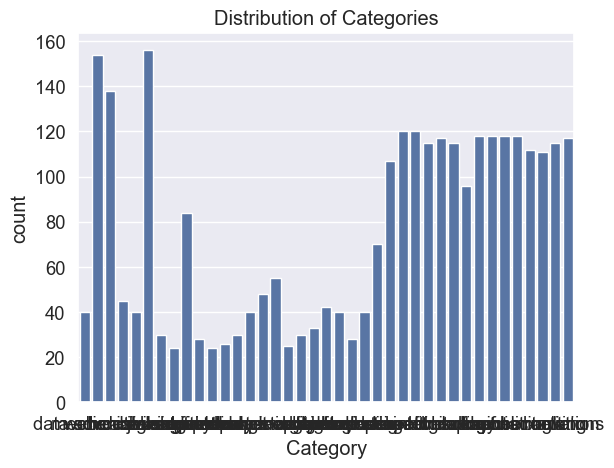

In [202]:
sns.countplot(x='Category', data=df)
plt.title('Distribution of Categories')
plt.show()

<Axes: xlabel='count', ylabel='Category'>

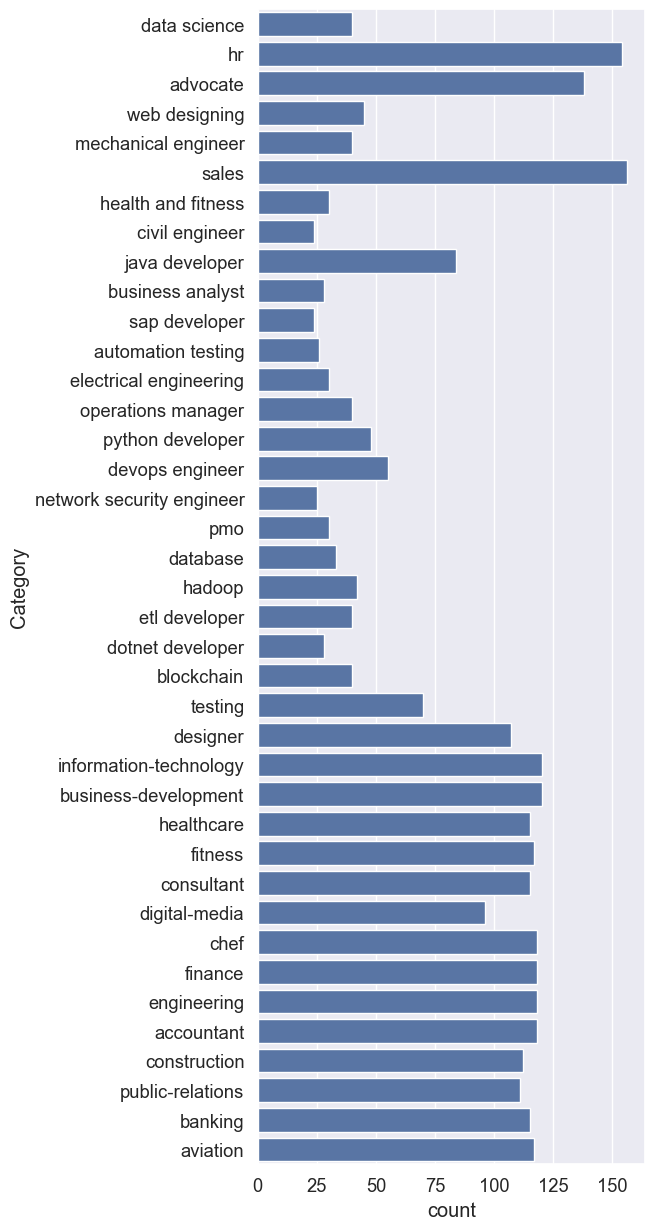

In [203]:
plt.figure(figsize = (5,15))
sns.countplot(df['Category'])


<Axes: xlabel='Category'>

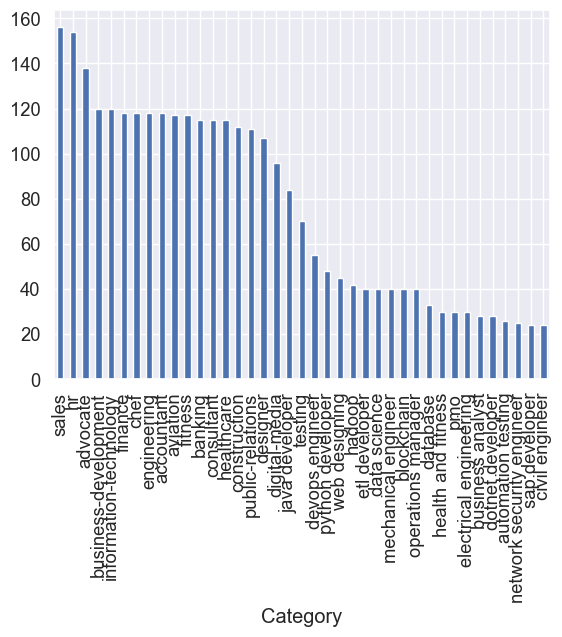

In [204]:
df['Category'].value_counts().plot(kind='bar')


In [205]:
df_balanced = df

In [206]:
df['Category'].unique()

array(['data science', 'hr', 'advocate', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing',
       'designer', 'information-technology', 'business-development',
       'healthcare', 'fitness', 'consultant', 'digital-media', 'chef',
       'finance', 'engineering', 'accountant', 'construction',
       'public-relations', 'banking', 'aviation'], dtype=object)

In [207]:
df_balanced['Category'].value_counts()

Category
sales                        156
hr                           154
advocate                     138
business-development         120
information-technology       120
finance                      118
chef                         118
engineering                  118
accountant                   118
aviation                     117
fitness                      117
banking                      115
consultant                   115
healthcare                   115
construction                 112
public-relations             111
designer                     107
digital-media                 96
java developer                84
testing                       70
devops engineer               55
python developer              48
web designing                 45
hadoop                        42
etl developer                 40
data science                  40
mechanical engineer           40
blockchain                    40
operations manager            40
database                      33
h

In [208]:
df_balanced.head()

,Category,Resume
0,data science,Skills * Programming Languages: Python (pandas...
1,data science,Education Details \r\nMay 2013 to May 2017 B.E...
2,data science,"Areas of Interest Deep Learning, Control Syste..."
3,data science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,data science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [209]:
df_balanced = df_balanced.reset_index(drop=True)

In [210]:
df_balanced

,Category,Resume
0,data science,Skills * Programming Languages: Python (pandas...
1,data science,Education Details \r\nMay 2013 to May 2017 B.E...
2,data science,"Areas of Interest Deep Learning, Control Syste..."
3,data science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,data science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
2982,aviation,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...
2983,aviation,"GOVERNMENT RELATIONS, COMMUNICATIONS ..."
2984,aviation,GEEK SQUAD AGENT Professional...
2985,aviation,PROGRAM DIRECTOR / OFFICE MANAGER ...


In [211]:
print(df_balanced['Resume'][62])

TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ SPSSEducation Details 
January 2017 MBA  Chidambaram, Tamil Nadu SNS College of Engineering
January 2014 HSC   at SAV Higher Secondary School
 MBA   SNS College of Engineering
 SSLC Finance  at Kamaraj Matriculation School
HR 


Skill Details 
Human resource, Finance- Exprience - Less than 1 year monthsCompany Details 
company - 
description - 


# Data Cleaning #

In [212]:
import re

def clean_text(text):
    text = re.sub(r'http\S+\s', ' ', text)  # Remove URLs
    text = re.sub('RT|cc', ' ', text)  # Remove RT and cc
    text = re.sub('#\S+\s', ' ', text)  # Remove hashtags           
    text = re.sub('@\S+\s', ' ', text)  # Remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # Remove punctuation
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub('\s+'," ", text)  # Remove extra whitespace
    text = text.lower()
    return text


In [213]:
df_balanced['Resume_cleaned']=df_balanced['Resume'].apply(lambda x:clean_text(x))

In [214]:
df_balanced['Resume_cleaned'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the 

# Converting words into categorical value #

In [215]:
df_balanced['Category']

0       data science
1       data science
2       data science
3       data science
4       data science
            ...     
2982        aviation
2983        aviation
2984        aviation
2985        aviation
2986        aviation
Name: Category, Length: 2987, dtype: object

In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [217]:
le.fit(df_balanced['Category'])
df_balanced['Category_encoded'] = le.transform(df_balanced['Category'])
df_balanced['Category_encoded'].value_counts()

Category_encoded
35    156
26    154
1     138
7     120
27    120
21    118
8     118
19    118
0     118
3     117
22    117
4     115
11    115
25    115
10    112
33    111
14    107
16     96
28     84
37     70
15     55
34     48
38     45
23     42
20     40
12     40
29     40
5      40
31     40
13     33
24     30
32     30
18     30
6      28
17     28
2      26
30     25
36     24
9      24
Name: count, dtype: int64

In [218]:
print(df_balanced['Category_encoded'])

0       12
1       12
2       12
3       12
4       12
        ..
2982     3
2983     3
2984     3
2985     3
2986     3
Name: Category_encoded, Length: 2987, dtype: int64


In [219]:
df_balanced['Category_encoded'].unique()

array([12, 26,  1, 38, 29, 35, 24,  9, 28,  6, 36,  2, 18, 31, 34, 15, 30,
       32, 13, 23, 20, 17,  5, 37, 14, 27,  7, 25, 22, 11, 16,  8, 21, 19,
        0, 10, 33,  4,  3])

In [231]:
df_balanced['Category'].unique()

array(['data science', 'hr', 'advocate', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing',
       'designer', 'information-technology', 'business-development',
       'healthcare', 'fitness', 'consultant', 'digital-media', 'chef',
       'finance', 'engineering', 'accountant', 'construction',
       'public-relations', 'banking', 'aviation'], dtype=object)

In [220]:
df_balanced.head()

,Category,Resume,Resume_cleaned,Category_encoded
0,data science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,12
1,data science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...,12
2,data science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,12
3,data science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,12
4,data science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,12


# Vectorization of Resume_cleaned #

In [221]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=5, stop_words='english')

tfidf.fit(df_balanced['Resume_cleaned'])
X = tfidf.transform(df_balanced['Resume_cleaned'])

# Splitting #

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_balanced['Category_encoded'], test_size=0.2, random_state=42)

In [223]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2389, 60185), (598, 60185), (2389,), (598,))

In [224]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversample minority classes
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Show class distribution after resampling
print(f"✅ After Oversampling: {Counter(y_train)}")

✅ After Oversampling: Counter({16: 122, 10: 122, 15: 122, 8: 122, 4: 122, 31: 122, 5: 122, 25: 122, 34: 122, 32: 122, 14: 122, 11: 122, 22: 122, 1: 122, 3: 122, 28: 122, 17: 122, 9: 122, 7: 122, 19: 122, 26: 122, 33: 122, 18: 122, 21: 122, 13: 122, 6: 122, 20: 122, 37: 122, 35: 122, 27: 122, 0: 122, 2: 122, 24: 122, 38: 122, 29: 122, 23: 122, 30: 122, 12: 122, 36: 122})


# Model #

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models and hyperparameters
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga'),
        {"C": [0.1, 1, 10, 100]}
    ),
    "Naive Bayes": (
        MultinomialNB(),
        {"alpha": [0.5, 1.0, 1.5]}  
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {"n_estimators": [5000], "max_depth": [100]}
    ),
    "SVM": (
        SVC(probability=True),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
    )
}

In [227]:
best_model = None
best_accuracy = 0
best_model_name = ""
best_model_params = {}

# Training and evaluation loop
for name, (model, params) in models.items():
    print(f"\n🔍 Training and tuning: {name}")
    
    grid = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"✅ Best Params: {grid.best_params_}")
    print(f"🎯 Accuracy: {accuracy:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid.best_estimator_
        best_model_name = name
        best_model_params = grid.best_params_

print(f"\n🏆 Best Model: {best_model_name}")
print(f"🔧 Params: {best_model_params}")
print(f"📈 Accuracy: {best_accuracy:.4f}")


🔍 Training and tuning: Logistic Regression


d:\Python\NLP\Profession_Identifier\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Best Params: {'C': 100}
🎯 Accuracy: 0.8244
📊 Classification Report:
                           precision    recall  f1-score   support

               accountant       0.76      0.88      0.81        25
                 advocate       0.73      0.52      0.60        31
       automation testing       1.00      0.78      0.88         9
                 aviation       0.75      0.75      0.75        20
                  banking       0.57      0.74      0.64        23
               blockchain       1.00      1.00      1.00         6
         business analyst       1.00      1.00      1.00         4
     business-development       0.74      0.80      0.77        25
                     chef       0.95      0.90      0.92        20
           civil engineer       1.00      1.00      1.00         3
             construction       0.83      0.87      0.85        23
               consultant       0.56      0.25      0.34        20
             data science       1.00      1.00      1.00  

In [246]:
best_model

RandomForestClassifier(max_depth=100, n_estimators=5000)

In [228]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print("✅ Best model saved as 'best_model.pkl'")

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("✅ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")


✅ Best model saved as 'best_model.pkl'
✅ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'


In [253]:
# Load model and vectorizer
model = joblib.load('best_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')


In [254]:
resume = """
         TEACHER
         Skills
         Educator: People skills, enthusiastic, problem-solver, great organizational skills, encouraging, technology savvy, eager to learn, communicates great with colleagues and parents, sets high and clear expectations for students, eager to teach, loves to teach students how to "love to learn", always looking for ways to grow as a person and educator

         Education
         University of Redlands, 2008 - Elementary Credentials: Education, City, State, United States
         California Baptist University, 2006 - Bachelor of Arts: Liberal Arts, City, State, United States

         Teaching Experience
         Company Name - Teacher, City, State
         Long term substitute for fifth grade. Hired as a probationary teacher and taught second grade for two years...
         [and so on for the rest of the text]

         Professional Development
         WRITE Institute. Get Ahead Writing. English Language Development. Common Core Math. Common Core Language Arts. Combination Class Support.

         Leadership
         Grade level lead for three years. Trainer of trainees for the WRITE Institute. Trainer of trainees for Common Core. RCD unit writer at my current site.

         Other Accomplishments
         Last year I was asked to administer the GATE after school program...
"""


In [255]:
resume1 = """
         TRANSITIONAL HOUSING ADVOCATE       Summary     Diversified background in providing services to culturally sensitive issues that involve clients. Proven record of absorbing new concepts easily and adapting to highly demanding situations. Exceptionally strong interpersonal and teamwork skills. Exhibits dependability in performing work and willingness to accept responsibilities. Strong skills in appropriate levels of written and verbal communication necessary in the job description. Combined with abilities to maintain effective and productive working relationships with fellow employees, supervisors and the public.       Accomplishments      Facilitated Empowerment through Art classes for survivors  Facilitated Healthy Relationship classes/Parenting classes  Increased office organization by developing more efficient data base RPMS  Coordinated office assistant functions for team of 3 employees        Education          Associate of Science  :  Truckee Community College   -   Psychology    City  ,   State               1995   Associate of Arts  :  Southwester Polytechnic Institute   -   General Studies    City  ,   State              Interests    Currently serve as a volunteer for the Sexual Assault Response Team (SART), provide support to victims in crisis, document vital information related to assault, and make appropriate referrals available victims.      Additional Information      Currently serve as a volunteer for the Sexual Assault Response Team (SART), provide support to victims in crisis, document vital information related to assault, and make appropriate referrals available victims.        Skills     Peer counseling, customer service, database, documentation, Internet Applications, Excel, e-mail, office, Outlook, Power Point, Publisher, Microsoft Word, Personnel, policies, presentations, safety, transportation       Experience      Transitional Housing Advocate   09/2013   ï¼   Current     Company Name     City  ,   State       Provide case management (goal planning, safety planning, resources, regular home visits)  Identify barriers to housing to prevent homelessness  Provide on-going education about domestic violence and sexual assault issues  Provide advocacy to help victims stay in their home (landlord tenant issues)  Manage multiple sources of funding through T-housing grant to assist victims          Mental Health Support Specialist   05/2013   ï¼   09/2013     Company Name     City  ,   State       Behavioral Services.  Develop service recipient's basic living skills (e.g., social, domestic, and hygiene) through instruction and encouragement.  Coordinate and maintain service recipient's schedule (doctor appointments, professional team appointments).  Adhere to service recipient's behavior and health management plans (administration of medication, use of behavior modification techniques).  Maintain documentation on each recipient served.  Serve as a good role model to service recipients.          Administrative Assistant   03/2013   ï¼   06/2013     Company Name     City  ,   State       Transcribe Tribal Council Meeting Minutes for the Tribal Chairman's office, prepare and submit minutes to appropriate persons and agencies per policy.          Community Liaison   06/2009   ï¼   10/2012     Company Name     City  ,   State       Victims Sevicest Program Conduct all program client intakes and interviews, obtain and maintain information on health and social needs.  Explain program services, requirements and policy, procedures.  Obtain and track client data though RPMS.  Provide case management to victims in the safe house Provide peer counseling to victims in crisis, safety plans, goal plans  Stabilize victims with family needs through referrals to emergency shelter, childcare, clothing, food banks and to various temporary job agencies.  Provide transportation and supportive services for clients to appointments and provide court advocacy.  Coordinate and facilitate Healthy Relationship and Women's Empowerment groups.  Conduct outreach for the Domestic Violence Program at various events and make presentations to other social services agencies.  Gather, prepare and submit monthly and quarterly reports.  Maintain confidentiality per policy.          Elders Support Coordinator   05/2007   ï¼   06/2009     Company Name     City  ,   State       Elders Program.  Elder Support Partner.  Maintain and Track client hours on State System (SAMS); prepare and submit monthly and quarterly reports to the granting agency.  Conduct all client intakes and interviews, assess each client on homemaker needs.  Assist Community Health Personnel with monthly luncheons and other elder related duties.  Provide transportation to the elderly to various appointments.          Technician III   01/2001   ï¼   04/2007     Company Name     City  ,   State       Interview and explain laws, regulations and policies to customers.  Evaluate individuals for physical and mental abilities to operate motor vehicles.  Oversee technicians who were in training for driver's license for durations of three months at a time.  Provide customer service tactfully and diplomatically in difficult situations.       """

In [259]:
resume2 = """TECHNICAL PROFICIENCIES Platform: Ubuntu/Fedora/Cent OS/Windows Database: MySQL Languages: Python, Tensorflow, Numpy, C, C++ Education Details 
January 2016 ME Computer Engineering Pune, Maharashtra Savitribai Phule Pune University
January 2014 B.E Computer Engineering Pune, Maharashtra Savitribai Phule Pune University
January 2010    RYK Science College, Maharashtra state board
January 2008    Maharashtra state board
Python developer 

Python Developer
Skill Details 
C++- Exprience - 6 months
MYSQL- Exprience - 6 months
PYTHON- Exprience - 6 monthsCompany Details 
company - Fresher
description - Python programming"""

In [263]:
cleaned_resume = clean_text(resume2) 

input_features = vectorizer.transform([cleaned_resume])

prediction = model.predict(input_features)[0]

In [264]:
job_label_mapping = {
    12: 'data science',
    26: 'hr',
    1: 'advocate',
    38: 'web designing',
    29: 'mechanical engineer',
    35: 'sales',
    24: 'health and fitness',
    9: 'civil engineer',
    28: 'java developer',
    6: 'business analyst',
    36: 'sap developer',
    2: 'automation testing',
    18: 'electrical engineering',
    31: 'operations manager',
    34: 'python developer',
    15: 'devops engineer',
    30: 'network security engineer',
    32: 'pmo',
    13: 'database',
    23: 'hadoop',
    20: 'etl developer',
    17: 'dotnet developer',
    5: 'blockchain',
    37: 'testing',
    14: 'designer',
    27: 'information-technology',
    7: 'business-development',
    25: 'healthcare',
    22: 'fitness',
    11: 'consultant',
    16: 'digital-media',
    8: 'chef',
    21: 'finance',
    19: 'engineering',
    0: 'accountant',
    10: 'construction',
    33: 'public-relations',
    4: 'banking',
    3: 'aviation'
}


In [265]:
category_name = job_label_mapping.get(prediction, "Unknown Category")
print(f"Predicted Category: {category_name}")

Predicted Category: python developer
